<a href="https://colab.research.google.com/github/knowbright/Pets-Classification/blob/main/Copy_of_petclassify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pet Classification with CNN

In [ ]:
# To mount the drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.regularizers import l2

In [ ]:
classifier = Sequential()

In [ ]:
# Convolution
classifier.add(Conv2D(32, 5, 5, input_shape = (256, 256, 3), activation = 'relu',kernel_regularizer=l2(l2=0.01)))
# classifier.add(BatchNormalization())

In [ ]:
# Pooling
pool_size = [2, 2]
stride = 2
classifier.add(MaxPooling2D(pool_size = pool_size, strides = stride))
classifier.add(Dropout(0.4))


In [ ]:
# Adding a second convolutional layer
classifier.add(Conv2D(64, 5, 5, activation = 'relu', kernel_regularizer=l2(l2=0.01)))
# classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size = pool_size, strides = stride ))
classifier.add(Dropout(0.4))

In [ ]:
# Flattening
classifier.add(Flatten())

In [ ]:
# Full connection
fc_size = 32
classifier.add(Dense(fc_size, activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(Dense(1, activation = 'sigmoid'))
#classifier.add(Dense(1, activation = 'softmax'))

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# To generate more images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2, # Rotate img anticlockwise
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/petClassificationCNN/data/train',
                                                 target_size = (256, 256),
                                                 batch_size = 16,
                                                 class_mode = 'binary')

Found 108 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/gdrive/MyDrive/petClassificationCNN/data/test',
                                            target_size = (256, 256),
                                            batch_size = 16,
                                            class_mode = 'binary')


Found 20 images belonging to 2 classes.


In [ ]:
! pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from livelossplot import PlotLossesKerasTF

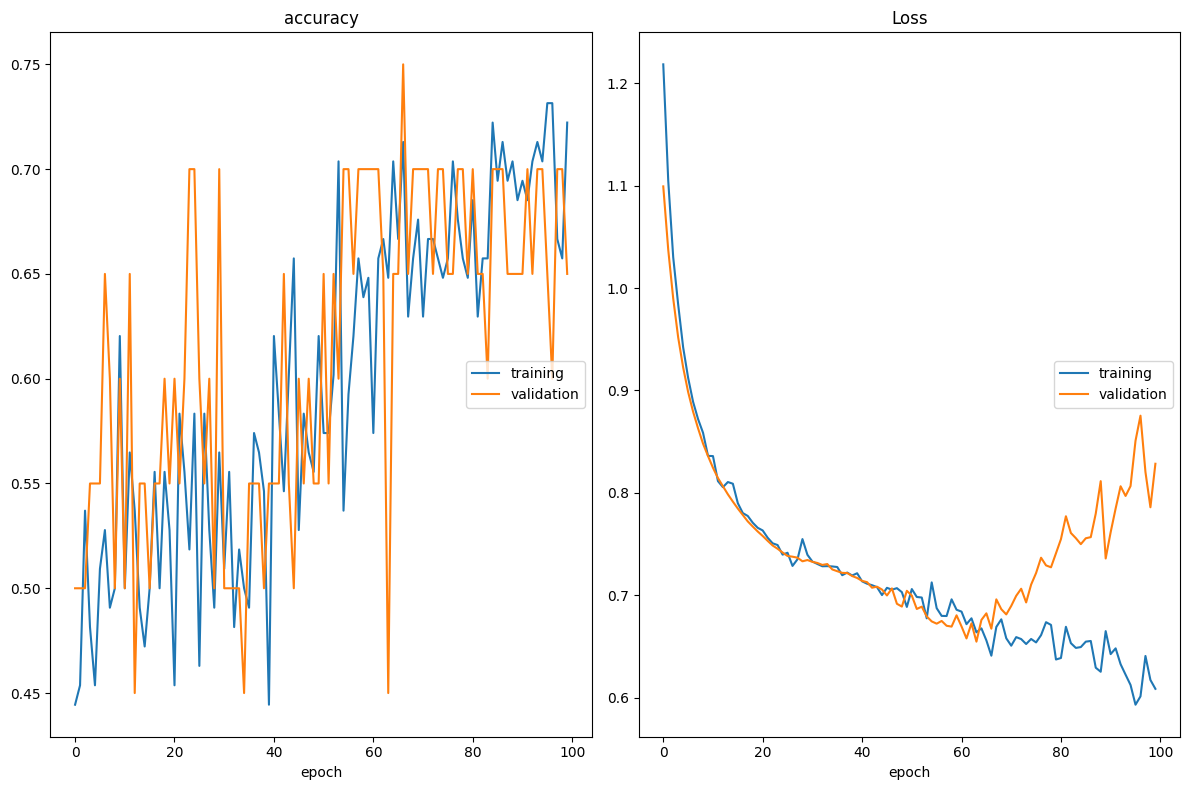

accuracy
	training         	 (min:    0.444, max:    0.731, cur:    0.722)
	validation       	 (min:    0.450, max:    0.750, cur:    0.650)
Loss
	training         	 (min:    0.593, max:    1.218, cur:    0.609)
	validation       	 (min:    0.655, max:    1.099, cur:    0.828)
7/7 [==============================] - 3s 463ms/step - loss: 0.6086 - accuracy: 0.7222 - val_loss: 0.8284 - val_accuracy: 0.6500


In [ ]:
classifier.fit(training_set,epochs=100,validation_data = test_set,callbacks=[PlotLossesKerasTF()])


In [ ]:
import numpy as np
# from keras.preprocessing import image
from tensorflow.keras.preprocessing import image

test_image = image.load_img('/content/gdrive/MyDrive/petClassificationCNN/data/test/cats/101.jpg',target_size=(256,256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = classifier.predict(test_image)

if result[0][0]>=0.5:
    prediction= 'dog'
    print('Result is',result[0][0])
else:
    prediction = 'cat'
    print('Result is',result[0][0])

print(prediction)

1/1 [==============================] - 0s 153ms/step
Result is 1.0
dog


In [ ]:
import numpy as np
# from keras.preprocessing import image
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/gdrive/MyDrive/petClassificationCNN/data/test/dogs/110.jpg',target_size=(256,256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0]>=0.5:
    prediction= 'dog'
    print('Result is',result[0][0])
else:
    prediction = 'cat'
    print('Result is',result[0][0])

print(prediction)

1/1 [==============================] - 0s 21ms/step
Result is 0.9796714
dog
